In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
PATH = '/mnt/c/Users/scl38887/Documents/git/aldehyde/'

In [4]:
# Sources:
#https://www.statista.com/outlook/mmo/electric-vehicles/morocco#unit-sales
# https://www.policycenter.ma/sites/default/files/2022-11/PB-26-21-Enel-Green-Power-EGP-EN-PART%20IV_0.pdf

In [5]:
# Create ramp up function of the share of electric vehicles in Morocco, starting from 1% in 2020 and reaching 92% in 2050

# Create a dataframe with the years and the share of electric vehicles
years = list(range(2020, 2051))

# Set the growth rate and the inflection point
k = 0.2 # growth rate
x0 = 2040 # inflection point

# Define function based on the mathematical description of the s-curve
def s_curve(x):
    return 1 / (1 + math.exp(-k*(x-x0)))

# Get share of electric vehicles from 2020 to 2050 based on the s-curve
share_ev = []
for year in years:
    share_ev.append(s_curve(year))

# Create dataframe with years and share of electric vehicles
df_ev = pd.DataFrame(data={'Share of EV': share_ev}, index=years)

In [6]:
# Create dataframe with the co2 cap from 1.0 in 2020 and 0.0 in 2050 linearly decreasing
co2_cap = []

def calculate_co2(year):
    return 1 - (year - 2020) * (1/30)

for year in years:
    co2_cap.append(calculate_co2(year))

# Create dataframe with years and co2 cap
df_co2_cap = pd.DataFrame(data={'CO2 cap': co2_cap}, index=years)

In [7]:
# Combine share of EV and co2 cap
df_ev_co2_cap = pd.concat([df_ev, df_co2_cap], axis=1)

In [8]:
# Required for the plot
def calculate_co2reduction(year):
    return 100 * ((year - 2020) * (1/30))

def inverse_co2reduction(x):
    return (3/10) * x + 2020

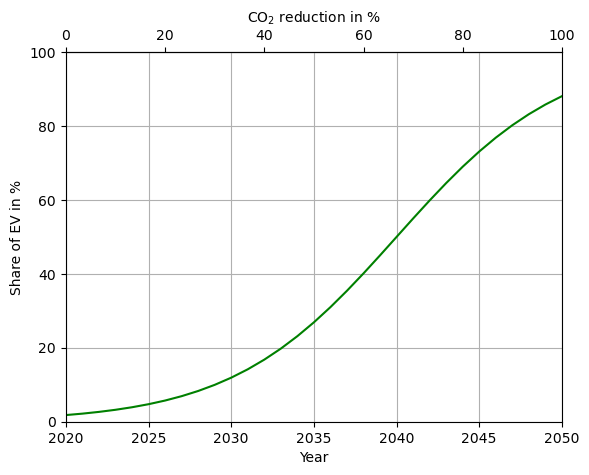

In [9]:
fig, ax = plt.subplots()
ax.plot(df_ev*100, color='green', label='Share of EV')
ax.set_xlabel('Year')
ax.set_ylabel('Share of EV in %')
ax.grid(True)
ax.set_ylim([0, 100])
ax.set_xlim([2020, 2050])

# Create a second y-axis
secax = ax.secondary_xaxis('top', functions=(calculate_co2reduction, inverse_co2reduction))
secax.set_xlabel('$\mathregular{CO_2}$ reduction in %')
# save the plot 
plt.savefig(PATH+'results/graphics_general/policy/bev_share.pdf', bbox_inches='tight')

plt.show()

In [10]:
df_ev["Share of EV"] = df_ev["Share of EV"].apply(lambda x: round(x, 2))

In [11]:
df_ev_co2_cap.head()

,Share of EV,CO2 cap
2020,0.017986,1.000000
2021,0.021881,0.966667
2022,0.026597,0.933333
2023,0.032295,0.900000
2024,0.039166,0.866667


In [12]:
co2_cap_list = list(np.arange(1.0, -0.1, -0.1).round(2))
ev_filtered = df_ev_co2_cap[df_ev_co2_cap["CO2 cap"].round(2).isin(co2_cap_list)]

In [13]:
# Switch columns
ev_filtered = ev_filtered[['CO2 cap', 'Share of EV']]

In [14]:
ev_filtered.round(2)

,CO2 cap,Share of EV
2020,1.0,0.02
2023,0.9,0.03
2026,0.8,0.06
2029,0.7,0.10
2032,0.6,0.17
2035,0.5,0.27
2038,0.4,0.40
2041,0.3,0.55
2044,0.2,0.69
2047,0.1,0.80
